<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment5/Assignment_5_RNN_Part1_Srinath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Assignment


1.   Srinath Mannam (229750)
2.   Meghana Rao (234907)
3.   Govind Shukla (235192)

# import statements

In [ ]:
import os
import tensorflow as tf
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda
import sys
import tensorflow.keras.backend as K
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.preprocessing import sequence

# Change the directory

In [ ]:
working_directory = '/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/05_Assignment'
def colabDrive():
    from google.colab import drive
    drive.mount("/content/drive")

    if os.getcwd() !=  working_directory:
      os.chdir(working_directory)
    print(os.getcwd())

In [ ]:
#colabDrive()

# Clears GPU memory

In [ ]:
def clearGPUMemory():
    from numba import cuda 
    device = cuda.get_current_device()
    device.reset()
    !nvidia-smi

In [ ]:
#clearGPUMemory()

# Prepare the data

## Load the dataset and remove infrequent words

In [ ]:
num_words = 20000
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

print('Loaded dataset with {} training samples, {} test samples'.format(len(train_sequences), len(test_sequences)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


## Have some look at train dataset

In [ ]:
# look at some sequences. words have been replaced with arbitrary index mappings
# 1 is a special "beginning of sequence" marker
# infrequent words have been replaced by the index 2
# actual words start with index 4, 3 is never used (???)
train_sequences[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
print('---review---')
print(train_sequences[6])
print('---label---')
print(train_labels[6])

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


## to restore words, load the word-to-index mapping

In [ ]:
word2id = tf.keras.datasets.imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in train_sequences[6]])
print('---label---')
print(train_sequences[6])
print('---label---')
print(train_labels[6])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and'

## Maximum review length and minimum review length.

In [ ]:
print('Maximum review length: {}'.format(len(max((train_sequences + test_sequences), key=len))))

Maximum review length: 2697


In [ ]:
print('Minimum review length: {}'.format(len(min((train_sequences + test_sequences), key=len))))

Minimum review length: 70


## Overview over the sequence length in the data

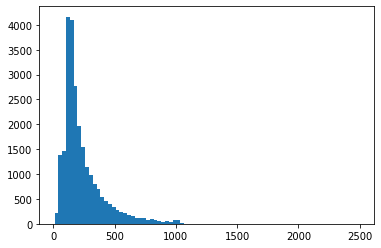

In [ ]:
sequence_lengths = [len(sequence) for sequence in train_sequences]
max_len = max(sequence_lengths)
max_len

plt.hist(sequence_lengths, bins=80)
plt.show()

## Pad Sequences  to some length because the dataset should be in rectangular for feeding to tensors

*  all sequences above maxlen will be truncated to that length
*  note: pad_sequences has "pre" and "post" options for both padding and truncation. one may be better than the other!

In [ ]:
max_words = 300
train_sequences = sequence.pad_sequences(train_sequences, maxlen=max_words, padding = "post", truncating = "post")
test_sequences = sequence.pad_sequences(test_sequences, maxlen=max_words, padding = "post", truncating = "post")

## Load the dataset into tensors

In [ ]:
train_labels = train_labels.reshape(-1).astype(np.int32)
test_labels = test_labels.reshape(-1).astype(np.int32)
# train_data = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels))
# test_data = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels))

train_data = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels)).shuffle(25000).batch(128, drop_remainder=True)
test_data = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels)).batch(128, drop_remainder=True)

In [ ]:
print("Training Dataset Size: ",train_sequences.shape)
print("Test Dataset Size: ",test_sequences.shape)

Training Dataset Size:  (25000, 300)
Test Dataset Size:  (25000, 300)


# Models Config

## Model1 Config

In [ ]:
modelConfig1 = {
    "epochs" : 10,
    "learning_rate" : 0.1,

    ##Input to hidden(U)
    "W_Inp_Hid":  tf.Variable(tf.random.uniform([20000, 64], minval=-0.1, maxval=0.1, dtype=np.float32)),
    ##Initial Previous hidden(ht-1)
    "Init_Prev_Hidden":  tf.Variable(np.zeros([1,64], dtype=np.float32)),
    ##Hidden to hidden(W)
    "W_Hid_Hid":  tf.Variable(tf.random.uniform([64, 64], minval=-0.1, maxval=0.1, dtype=np.float32)),
    ##bias(b)
    "b": tf.Variable(np.zeros((1, 64), dtype=np.float32)),
    ##Hidden to hidden(W)
    "W_Hid_Out":  tf.Variable(tf.random.uniform([64, 2], minval=-0.1, maxval=0.1, dtype=np.float32)),
    ##bias(c)
    "c": tf.Variable(np.zeros((128, 2), dtype=np.float32))
}

# Generic Function for training, testing

## RNN Cell

In [ ]:
def rnn_loop(sequences, modelConfig):
    old_state = modelConfig['Init_Prev_Hidden']
    seq_onehot = tf.one_hot(sequences, depth=num_words)

    for step in range(max_words):
        x_t = seq_onehot[:,step]
        at = modelConfig['b'] + tf.matmul(old_state, modelConfig['W_Hid_Hid']) + tf.matmul(x_t, modelConfig['W_Inp_Hid'])
        new_state = tf.nn.tanh(at)
        old_state = new_state

    o_t = modelConfig['c'] + tf.matmul(new_state, modelConfig['W_Hid_Out'])

    return o_t

## Training and Test Loop

In [ ]:
def train_loop(modelConfig):
    optimizer = tf.keras.optimizers.Adam(learning_rate=modelConfig['learning_rate'])
    for epoch in range(modelConfig['epochs']):
      print("Epoch No: ", epoch)
      for step, (sequence_batch, label_batch) in enumerate(train_data):
          # label_batch = tf.reshape(label_batch, [1])
          with tf.GradientTape() as tape:
              logits = rnn_loop(sequence_batch, modelConfig)
              xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                  logits=logits, labels=label_batch))

          ## Gradients calculation and update weights
          grads = tape.gradient(xent, [modelConfig['W_Inp_Hid'], modelConfig['W_Hid_Hid'], modelConfig['b'], modelConfig['W_Hid_Out'], modelConfig['c']])
          optimizer.apply_gradients(zip(grads, [modelConfig['W_Inp_Hid'], modelConfig['W_Hid_Hid'], modelConfig['b'], modelConfig['W_Hid_Out'], modelConfig['c']]))


          if not step % 50:
              print("Steps Completed: ", step)
              preds = tf.argmax(logits, axis=1, output_type=tf.int32)
              acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch), tf.float32))
              print("Loss: {} Accuracy: {}".format(xent, acc))
          
      print("-------------\n")

    #Testing
    print("Working on test dataset")
    testAcc = []
    for step, (sequence_batch, label_batch) in enumerate(test_data):
        if not step % 50:
          print("Steps Completed: ", step)
        logits = rnn_loop(sequence_batch, modelConfig)
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch), tf.float32))
        testAcc.append(acc)

    print("Final Test Accuracy Average: {} ".format(sum(testAcc)/len(testAcc)))


# Different Models Running



## Model1

1.   With 10 Epochs
2.   The test accuracy is 49.6%
3.   Batch Size of 128
4.   Hidden layer neurons are 64
5.   Max corpus length 20000
6.   Max words 300, padding post, truncating post

In [ ]:
train_loop(modelConfig1)

Epoch No:  0
Steps Completed:  0
Loss: 0.696199357509613 Accuracy: 0.4609375
Steps Completed:  50
Loss: 0.9726694822311401 Accuracy: 0.484375
Steps Completed:  100
Loss: 0.7283741235733032 Accuracy: 0.53125
Steps Completed:  150
Loss: 0.746300995349884 Accuracy: 0.53125
-------------

Epoch No:  1
Steps Completed:  0
Loss: 0.8708627223968506 Accuracy: 0.5703125
Steps Completed:  50
Loss: 0.7043036818504333 Accuracy: 0.5546875
Steps Completed:  100
Loss: 0.8352829217910767 Accuracy: 0.484375
Steps Completed:  150
Loss: 0.7988328337669373 Accuracy: 0.5390625
-------------

Epoch No:  2
Steps Completed:  0
Loss: 0.6984706521034241 Accuracy: 0.5859375
Steps Completed:  50
Loss: 0.6942040920257568 Accuracy: 0.59375
Steps Completed:  100
Loss: 0.6530992388725281 Accuracy: 0.609375
Steps Completed:  150
Loss: 0.8190151453018188 Accuracy: 0.46875
-------------

Epoch No:  3
Steps Completed:  0
Loss: 0.7579739093780518 Accuracy: 0.5234375
Steps Completed:  50
Loss: 0.7478058934211731 Accuracy: 

# References


1.   https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e
2.   List item

